- Họ và tên: Võ Đức Trọng
- MSSV: 19110494

In [1]:

#import các thư viện 
import tensorflow as tf #thư viện tensorflow
import keras #Thư viện keras
import numpy as np #Thư viện numpy
import matplotlib.pyplot as plt #Thư viện matplotlib để vẽ đồ thị

In [2]:
#Kiểm tra version của keras
keras.__version__

'2.9.0'

In [3]:
# Hàm show nhiều ảnh.
def ShowImage(list_image,list_label=None):
    if list_label==None:
        list_label=[]
        for i in range(len(list_image)):
            list_label.append('image'+str(i+1))
    n = len(list_image)
    cols = 3
    rows = n//cols
    if(n% cols != 0):
        rows = rows +1
    fig = plt.figure(figsize=(cols*8,rows*5))
    for i in range(n):
        fig.add_subplot(rows, cols, i+1)
        image = list_image[i]
        plt.imshow(image,plt.cm.gray)
        plt.title("Label "+str(list_label[i]))
    plt.show()

Tập train có  60000
Tập test có  10000
Kích thước ảnh (28, 28)

 Show thử vài bức ảnh


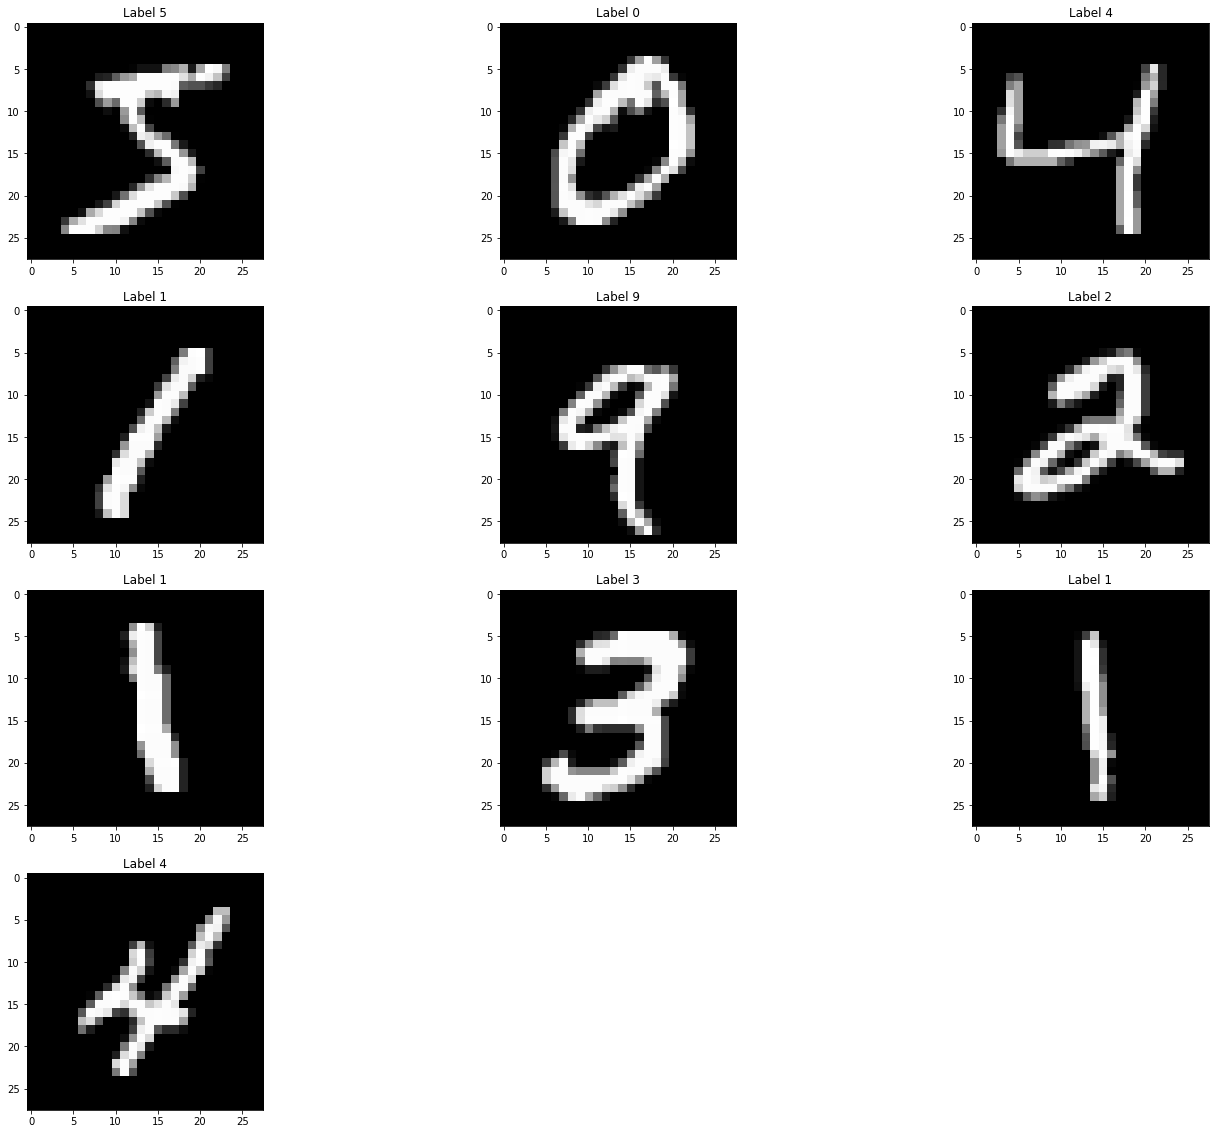

In [4]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
##resacle ảnh thành ảnh thực trong đoạn [0,1]
X_train, X_test = X_train/255.0, X_test/255.0

##in dataset
print("Tập train có ", len(X_train))
print("Tập test có ", len(X_test))
print("Kích thước ảnh",X_train.shape[1:3])
print()

# Show thử vài bức ảnh
print(" Show thử vài bức ảnh")
ShowImage(X_train[:10],y_train[:10].tolist())

#Tách một phần tập train thành tập valid
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1) # Tách theo tỉ lệ va

# 1. Hãy tạo và huấn luyện một mạng no-ron theo cấu trúc sau trên tập MNIST


## Model

In [2]:
inputs = keras.layers.Input(shape=(28,28))

inputs_reshape = keras.layers.Reshape((28,28,1))(inputs)

conv = keras.layers.Convolution2D(filters=20,
                                 kernel_size=[5,5],
                                 strides=[1,1],
                                 padding='same',
                                 activation=tf.nn.relu)(inputs_reshape)

maxpool = keras.layers.MaxPool2D(pool_size=[2,2],
                                strides=[2,2])(conv)

conv_2 = keras.layers.Convolution2D(filters=20,
                                 kernel_size=[5,5],
                                 strides=[1,1],
                                 padding='valid',
                                 activation=tf.nn.relu)(maxpool)

maxpool_2 = keras.layers.MaxPool2D(pool_size=[2,2],
                                strides=[2,2])(conv_2)

flatten = keras.layers.Flatten()(maxpool_2)

dense4= keras.layers.Dense(units=20,activation="relu")(flatten)

softmax = keras.layers.Dense(units=10, activation='softmax')(dense4)

model = keras.models.Model(inputs=inputs, outputs=softmax)

model.compile(optimizer='adam',
             loss=tf.keras.losses.sparse_categorical_crossentropy,
             metrics=["accuracy"])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 20)        520       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 20)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 20)        10020     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 20)         0         
 2D)                                                         

## Training

In [6]:
history=model.fit(X_train,y_train,
                  epochs=10,
                  batch_size=100,
                  validation_data=(X_valid,y_valid))

# model_4.save_weights("first_model.h5")

# model_4.load_weights("first_model.h5")

test_loss, test_acc = model.evaluate(X_test, y_test)
print("Loss trên tập test: ", test_loss," Accuracy trên tập test: ", test_acc)

Epoch 1/10
540/540 [==============================] - 28s 51ms/step - loss: 0.4341 - accuracy: 0.8745 - val_loss: 0.1409 - val_accuracy: 0.9595
Epoch 2/10
540/540 [==============================] - 28s 53ms/step - loss: 0.1147 - accuracy: 0.9654 - val_loss: 0.0911 - val_accuracy: 0.9697
Epoch 3/10
540/540 [==============================] - 25s 46ms/step - loss: 0.0806 - accuracy: 0.9754 - val_loss: 0.0916 - val_accuracy: 0.9722
Epoch 4/10
540/540 [==============================] - 26s 48ms/step - loss: 0.0641 - accuracy: 0.9802 - val_loss: 0.0630 - val_accuracy: 0.9805
Epoch 5/10
540/540 [==============================] - 27s 50ms/step - loss: 0.0548 - accuracy: 0.9831 - val_loss: 0.0645 - val_accuracy: 0.9797
Epoch 6/10
540/540 [==============================] - 25s 46ms/step - loss: 0.0480 - accuracy: 0.9845 - val_loss: 0.0634 - val_accuracy: 0.9800
Epoch 7/10
540/540 [==============================] - 26s 49ms/step - loss: 0.0420 - accuracy: 0.9866 - val_loss: 0.0577 - val_accuracy:

# 2. Nêu cách tính các kết quả có trong Param # ở câu 1

- Từ input đến flatten là việc lấy data và Reshape lại data nên ta có Param = 0
- Từ reshape : (None, 28, 28, 1) đến conv2d : (None, 28, 28, 20), trong lớp conv2d sử dụng kernel_size[5,5] thêm 1 param của bias và mình có 20 filters nên số param sẽ là: (5x5+1)x 20 = 520
- Từ conv2d : (None, 28, 28, 20) đến max_pooling2d : (None, 14, 14, 20). Lớp layer này chỉ đơn giản là lấy giá trị max nên không có Param
- Từ max_pooling2d : (None, 14, 14, 20) đến conv2d_1 : (None, 10, 10, 20), trong lớp conv2d sử dụng kernel_size[5,5], đầu vào mới 20 layer với thêm 1 param của bias và mình có 20 filters nên số param sẽ là: (5x5x20+1)x20 =10020
- Từ conv2d_1 : (None, 10, 10, 20) đến max_pooling2d_1 : (None, 5, 5, 20) cũng lấy giá trị max nên không tốn param
- Từ max_pooling2d_1 : (None, 5, 5, 20) đến flatten : (None, 500) mình đập dẹp các layer ra rồi ghép lại thành mảng một chiều nên không có param
- Từ flatten : (None, 500) đến dense : (None, 20) sẽ tốn (500 + 1 bias) x 20 = 10020 param (fully connected layer)
- Từ dense : (None, 20) đến dense_1 : (None, 10) sẽ tốn (20 + 1 bias) x 10 = 210 param (fully connected layer)